In [1]:
import pandas as pd
import matplotlib as plt
import utils

In [2]:
df_movies_meta = pd.read_csv('the-movies-dataset/movies_metadata.csv')

In [3]:
movies_dict = utils.mount_movies_dict(df_movies_meta.head(18000))

In [4]:
reform = {(outerKey, innerKey): values 
              for outerKey, innerDict in movies_dict.items() 
                  for innerKey, values in innerDict.items()}

In [5]:
df_movies = pd.DataFrame.from_dict(movies_dict)

In [6]:
df_movies = df_movies.T

In [7]:
df_movies.index.name = "id_movie"

In [8]:
df_movies

,title,budget,vote_count,vote_avg,revenue,genres,runtime,popularity,profit
id_movie,,,,,,,,,
862,Toy Story,3e+07,5415,7.7,3.73554e+08,"[ Animation, Comedy, Family]",81,21.9469,-3.43554e+08
8844,Jumanji,6.5e+07,2413,6.9,2.62797e+08,"[ Adventure, Fantasy, Family]",104,17.0155,-1.97797e+08
15602,Grumpier Old Men,0,92,6.5,0,"[ Romance, Comedy]",101,11.7129,0
31357,Waiting to Exhale,1.6e+07,34,6.1,8.14522e+07,"[ Comedy, Drama, Romance]",127,3.85949,-6.54522e+07
11862,Father of the Bride Part II,0,173,5.7,7.65789e+07,[ Comedy],106,8.38752,-7.65789e+07
...,...,...,...,...,...,...,...,...,...
206052,Out California Way,0,0,0,0,"[ Western, Music]",67,0.225376,0
72571,Paranormal Activity 3,5e+06,685,5.9,2.05704e+08,[ Horror],83,10.9963,-2.00704e+08
72432,Puncture,0,119,6.5,68945,"[ Drama, Mystery]",100,4.36309,-68945


In [9]:
df_movies.budget = df_movies.budget.map(pd.to_numeric)
df_movies.revenue = df_movies.revenue.map(pd.to_numeric)
df_movies.profit = df_movies.profit.map(pd.to_numeric)

In [10]:
df_movies['real_profit'] = df_movies['revenue'] - df_movies['budget']

In [11]:
df_movies

,title,budget,vote_count,vote_avg,revenue,genres,runtime,popularity,profit,real_profit
id_movie,,,,,,,,,,
862,Toy Story,30000000.0,5415,7.7,373554033.0,"[ Animation, Comedy, Family]",81,21.9469,-343554033.0,343554033.0
8844,Jumanji,65000000.0,2413,6.9,262797249.0,"[ Adventure, Fantasy, Family]",104,17.0155,-197797249.0,197797249.0
15602,Grumpier Old Men,0.0,92,6.5,0.0,"[ Romance, Comedy]",101,11.7129,0.0,0.0
31357,Waiting to Exhale,16000000.0,34,6.1,81452156.0,"[ Comedy, Drama, Romance]",127,3.85949,-65452156.0,65452156.0
11862,Father of the Bride Part II,0.0,173,5.7,76578911.0,[ Comedy],106,8.38752,-76578911.0,76578911.0
...,...,...,...,...,...,...,...,...,...,...
206052,Out California Way,0.0,0,0,0.0,"[ Western, Music]",67,0.225376,0.0,0.0
72571,Paranormal Activity 3,5000000.0,685,5.9,205703818.0,[ Horror],83,10.9963,-200703818.0,200703818.0
72432,Puncture,0.0,119,6.5,68945.0,"[ Drama, Mystery]",100,4.36309,-68945.0,68945.0


In [12]:
len(df_movies.title.unique())

17426

In [13]:
len(df_movies[df_movies.vote_avg == 10])

30

In [14]:
top10movies_profit = df_movies.sort_values(by='real_profit', ascending=False)[:10]

In [15]:
top10movies_profit

,title,budget,vote_count,vote_avg,revenue,genres,runtime,popularity,profit,real_profit
id_movie,,,,,,,,,,
19995,Avatar,237000000.0,12114,7.2,2.787965e+09,"[ Action, Adventure, Fantasy, Science Fiction]",162,185.071,-2.550965e+09,2.550965e+09
597,Titanic,200000000.0,7770,7.5,1.845034e+09,"[ Drama, Romance, Thriller]",194,26.8891,-1.645034e+09,1.645034e+09
24428,The Avengers,220000000.0,12000,7.4,1.519558e+09,"[ Science Fiction, Action, Adventure]",143,89.8876,-1.299558e+09,1.299558e+09
12445,Harry Potter and the Deathly Hallows: Part 2,125000000.0,6141,7.9,1.342000e+09,"[ Family, Fantasy, Adventure]",130,24.9907,-1.217000e+09,1.217000e+09
122,The Lord of the Rings: The Return of the King,94000000.0,8226,8.1,1.118889e+09,"[ Adventure, Fantasy, Action]",201,29.3244,-1.024889e+09,1.024889e+09
38356,Transformers: Dark of the Moon,195000000.0,3351,6.1,1.123747e+09,"[ Action, Science Fiction, Adventure]",154,4.50351,-9.287470e+08,9.287470e+08
10193,Toy Story 3,200000000.0,4710,7.6,1.066970e+09,"[ Animation, Family, Comedy]",103,16.9665,-8.669697e+08,8.669697e+08
58,Pirates of the Caribbean: Dead Man's Chest,200000000.0,5380,7,1.065660e+09,"[ Adventure, Fantasy, Action]",151,29.4553,-8.656598e+08,8.656598e+08
329,Jurassic Park,63000000.0,4956,7.6,9.201000e+08,"[ Adventure, Science Fiction]",127,8.86378,-8.571000e+08,8.571000e+08


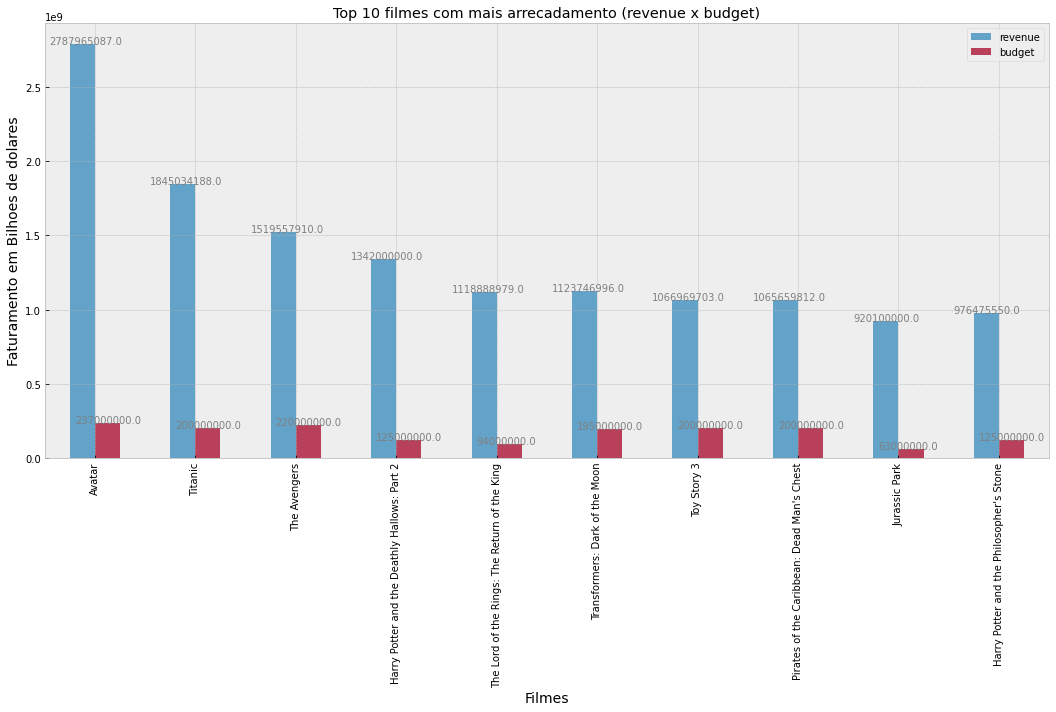

In [20]:
%matplotlib inline
plt.style.use('bmh')

ax = top10movies_profit.plot(
    x = "title", 
    y=["revenue", "budget"], 
    kind="bar", 
    figsize=(18,8),
    rot=90,
    alpha=0.75,
    fontsize = 10,
    legend=True,
    title="Top 10 filmes com mais arrecadamento (revenue x budget)")

ax.set_ylabel('Faturamento em Bilhoes de dolares', fontsize=14)
ax.set_xlabel('Filmes', fontsize=14)

for i in ax.patches:
    #print(i)
    ax.text(i.get_x()-.2, i.get_height()+1200, str(i.get_height()), fontsize=10, color='gray')